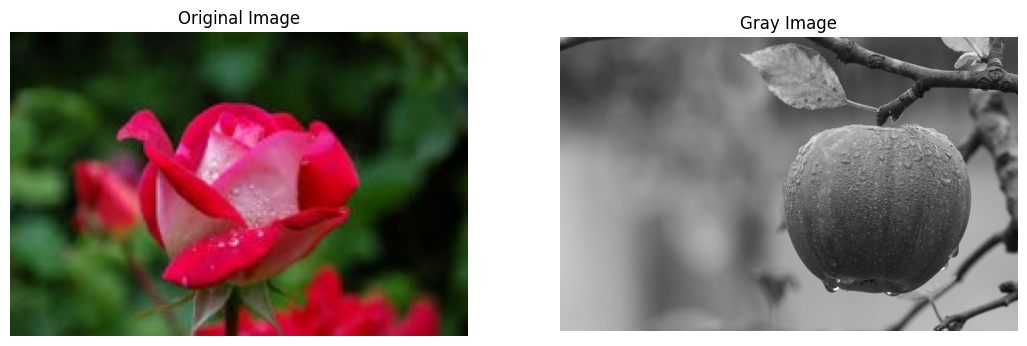

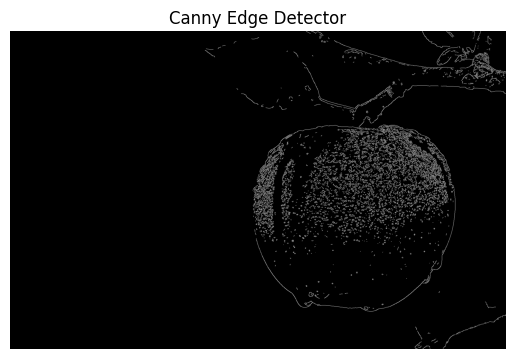

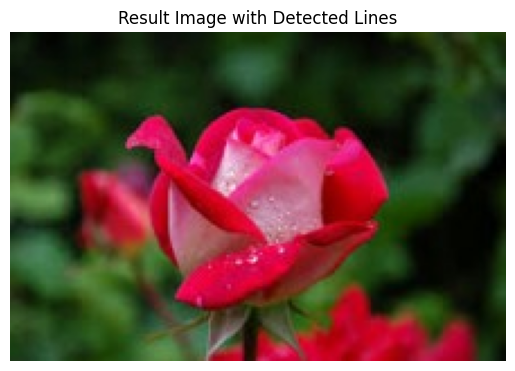

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the gray image using imread
gray = cv2.imread('gray.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace 'image_path.jpg' with the actual path

# Read the color image using imread
img_c = cv2.imread('rose.jpg')  # Replace 'image_path.jpg' with the actual path

# Convert the color from BGR to RGB
img_c = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

# Convert the gray image to RGB (this step is optional if you want to visualize the gray image in an RGB plot)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Apply Gaussian blur
gray_blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Display original and grayscale images
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img_c)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray_blurred, cmap='gray')
plt.title("Gray Image")
plt.axis("off")
plt.show()

# Apply Canny edge detection
canny = cv2.Canny(gray_blurred, 120, 150)

# Display the Canny edge detector result
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detector")
plt.axis("off")
plt.show()

# Apply Hough Lines to detect lines in the Canny image
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=80, minLineLength=50, maxLineGap=250)

# Draw the detected lines on the color image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_c, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Display the result image with lines
plt.imshow(img_c)
plt.title("Result Image with Detected Lines")
plt.axis("off")
plt.show()
